## 3. Write a program to demonstrate the working of the decision tree based ID3 algorithm. Use an appropriate data set for building the decision tree and apply this knowledge to classify a new sample.
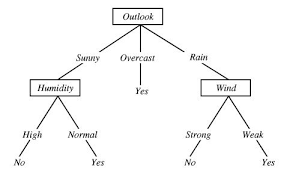


In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset= pd.read_csv('PlayTennis.csv',names=['outlook','temperature','humidity','wind','class',])

In [3]:
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in
    range(len(elements))])
    return entropy

In [4]:
def InfoGain(data,split_attribute_name,target_name="class"):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain

In [5]:
def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    elif len(features) ==0:
        return parent_node_class
    else:
        parent_node_class=np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
    item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
    best_feature_index = np.argmax(item_values)
    best_feature = features[best_feature_index]
    tree = {best_feature:{}}
    features = [i for i in features if i != best_feature]
    for value in np.unique(data[best_feature]):
        value = value
        sub_data = data.where(data[best_feature] == value).dropna()
        subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
        tree[best_feature][value] = subtree
    return(tree)

In [6]:
tree = ID3(dataset,dataset,dataset.columns[:-1])
print(' \nDisplay Tree\n',tree)

 
Display Tree
 {'outlook': {'Overcast': 'Yes', 'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}
